주사위 시뮬레이션결과를 시각화 하고 분석하시오.
– 1~6 사이의 랜덤 숫자를 만들어, 다음 횟수만큼 시행하시오.
– 100번 시행, 1,000번 시행, 10,000번 시행, 100,000번 시행
– 시행결과를 하나의 csv 파일로 저장하시오. (저장 format 자유)
– 각 시행별 데이터를 읽어와 1~6 숫자에 대해 히스토그램으로 각각 시각화 하시오. (그래프
총 4개)
– 위 그래프들을 통해 주사위 시뮬레이션 결과에 대한 분석결과를 설명하시오. (문제에 대한
답)
– 단, 그래프와 출력 결과의 Accuracy and Quality로 평가.

In [6]:
import csv
import random
def main():
    # 1,6까지 다이스를 굴리고, 범위밖의 것들에는 0을 부여한다.
    file="q2.csv"
    #재현 가능을 위해서 seed를 줌
    random.seed(100)
    dice100=[random.randint(1,6) if i<100  else 0 for i in range(100000) ]
    dice1000=[random.randint(1,6) if i<1000  else 0 for i in range(100000) ]
    dice10000=[random.randint(1,6) if i<10000  else 0 for i in range(100000) ]
    dice100000=[random.randint(1,6) for _ in range(100000) ]

    stackDice=["{},{},{},{}\n".format(dice100[i],dice1000[i],dice10000[i],dice100000[i]) for i in range(100000)]
    f=open(file,'w',encoding='cp949')
    f.write("dice 100,dice 1000,dice 10000,dice 100000\n")
    for i in range(100000):
        f.write(stackDice[i])
    f.close()



if __name__ == "__main__":
    #csv 파일 저장까지
    main()

In [2]:
import numpy
a=[1,2,3,4,5,6]
numpy.std(a)

1.707825127659933

주사위의 평균 : 3.5, 표준편차 , 1.707825127659933
dice 100 평균 : 3.58, 표준편차 : 1.668412419037931
dice 1000 평균 : 3.565, 표준편차 : 1.7713765833385062
dice 10000 평균 : 3.5187, 표준편차 : 1.7085813735377078
dice 100000 평균 : 3.50937, 표준편차 : 1.7051604625665


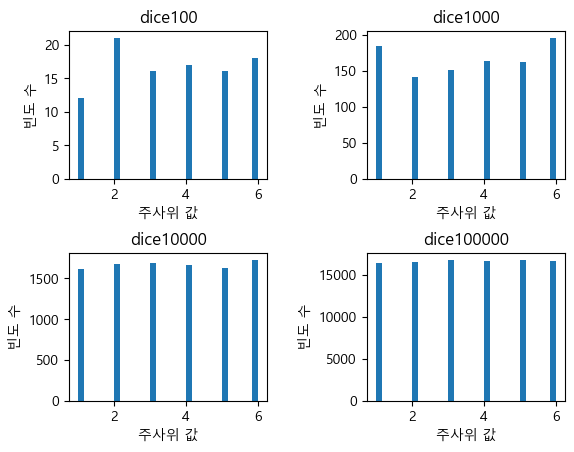

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy

def main():
    # 1,6까지 다이스를 굴리고, 범위밖의 것들에는 0을 부여한다.
    file="q2.csv"

    f=open(file,'r',encoding='cp949')
    data=csv.reader(f)
    head=next(data)
    stackDice=[]
    for d in data:
        stackDice.append(d)
    f.close()
    dice100=sorted([int(stackDice[i][0])  for i in range(100) ])
    dice1000=sorted([int(stackDice[i][1])  for i in range(1000) ])
    dice10000=sorted([int(stackDice[i][2])  for i in range(10000) ])
    dice100000=sorted([int(stackDice[i][3])  for i in range(100000) ])

    fig=plt.figure()

    plt.rc("font",family="Malgun Gothic")
    plt.rcParams['axes.unicode_minus']=False    
    ax1=fig.add_subplot(2,2,1)
    ax2=fig.add_subplot(2,2,2)
    ax3=fig.add_subplot(2,2,3)
    ax4=fig.add_subplot(2,2,4)

    fig.subplots_adjust(wspace=0.5,hspace=0.5)

    dice16=[1,2,3,4,5,6]
    print("주사위의 평균 : {}, 표준편차 , {}".format(numpy.mean(dice16),numpy.std(dice16)))
    
    ax1.hist(dice100,bins=30)
    print("dice 100 평균 : {}, 표준편차 : {}".format(numpy.mean(dice100),numpy.std(dice100)))
    ax1.set_title("dice100")
    ax1.set_xlabel("주사위 값")
    ax1.set_ylabel("빈도 수")

    ax2.hist(dice1000,bins=30)
    print("dice 1000 평균 : {}, 표준편차 : {}".format(numpy.mean(dice1000),numpy.std(dice1000)))
    ax2.set_title("dice1000")
    ax2.set_xlabel("주사위 값")
    ax2.set_ylabel("빈도 수")

    ax3.hist(dice10000,bins=30)
    print("dice 10000 평균 : {}, 표준편차 : {}".format(numpy.mean(dice10000),numpy.std(dice10000)))
    ax3.set_title("dice10000")
    ax3.set_xlabel("주사위 값")    
    ax3.set_ylabel("빈도 수")

    ax4.hist(dice100000,bins=30)
    print("dice 100000 평균 : {}, 표준편차 : {}".format(numpy.mean(dice100000),numpy.std(dice100000)))
    ax4.set_title("dice100000")
    ax4.set_xlabel("주사위 값")
    ax4.set_ylabel("빈도 수")
    plt.show()

if __name__ == "__main__":
    #csv 파일 저장까지
    main()


평균이 점점 3.5에 가까워지며, 기댓값에 근접하고 있다. ((1+2+3+4+5+6)/6)
